<a href="https://colab.research.google.com/github/Mercymerine/Machine_learning2/blob/main/web_traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Packages**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## **Importing Dataset**

In [3]:
df = pd.read_csv('/content/train_1.csv')

In [4]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [5]:
#Transforming data from wide to long format
df_1 = pd.melt(df, id_vars=['Page'], var_name='Date', value_name='Views')
df_1.head()

,Page,Date,Views
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,NaN


In [6]:
# Creating a dataframe using the date and views columns
df2 = pd.DataFrame(df_1, columns=['Date', 'Views'])

In [7]:
df2.head()

,Date,Views
0,2015-07-01,18.0
1,2015-07-01,11.0
2,2015-07-01,1.0
3,2015-07-01,35.0
4,2015-07-01,NaN


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79784650 entries, 0 to 79784649
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Date    object 
 1   Views   float64
dtypes: float64(1), object(1)
memory usage: 1.2+ GB


In [10]:
df2.isnull().sum()

,0
Date,0
Views,6192931


In [11]:
# Using interpolation to fill in missing values in views colum
df2['Views'] = df2['Views'].interpolate(method='linear')

In [12]:
df2.isnull().sum()

,0
Date,0
Views,0


In [13]:
df2

,Date,Views
0,2015-07-01,18.0
1,2015-07-01,11.0
2,2015-07-01,1.0
3,2015-07-01,35.0
4,2015-07-01,23.5
...,...,...
79784645,2016-12-31,10.0
79784646,2016-12-31,10.0
79784647,2016-12-31,10.0
79784648,2016-12-31,10.0


In [14]:
# Converting the date column to datetime and making it an index colum with a frequency of MS
df2['Date'] = pd.to_datetime(df2['Date'])



In [16]:
df2.set_index('Date', inplace=True)

In [17]:
df2.head()

,Views
Date,
2015-07-01,18.0
2015-07-01,11.0
2015-07-01,1.0
2015-07-01,35.0
2015-07-01,23.5


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 79784650 entries, 2015-07-01 to 2016-12-31
Data columns (total 1 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Views   float64
dtypes: float64(1)
memory usage: 1.2 GB


In [20]:
print(df2.index.freq)

None


In [24]:
df2 = df2.resample('D').sum()
df2

,Views
Date,
2015-07-01,187742741.5
2015-07-02,176087869.0
2015-07-03,166031150.0
2015-07-04,170745247.0
2015-07-05,178315107.0
...,...
2016-12-27,239493127.0
2016-12-28,233467306.5
2016-12-29,240113459.0


In [59]:
df2.isnull().sum()

,0
Views,0


In [60]:
df2 = df2.resample('D').sum().interpolate(method='linear')

In [61]:
df2.asfreq('D')

,Views
Date,
2015-07-01,187742741.5
2015-07-02,176087869.0
2015-07-03,166031150.0
2015-07-04,170745247.0
2015-07-05,178315107.0
...,...
2016-12-27,239493127.0
2016-12-28,233467306.5
2016-12-29,240113459.0


## **Plot the source data**

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Views')]

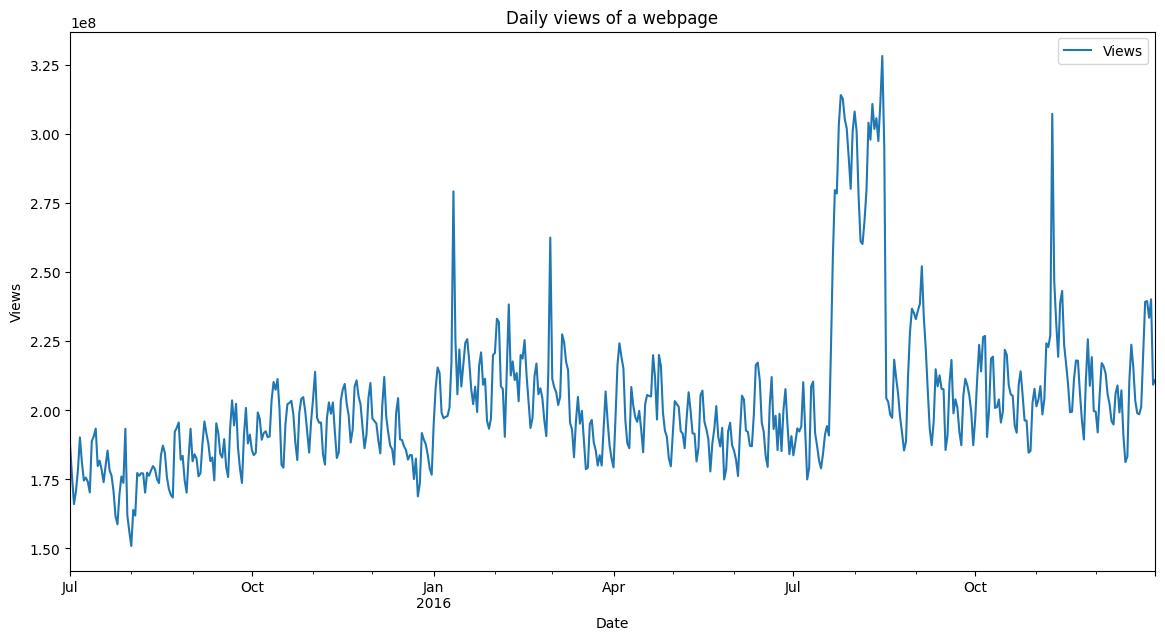

In [62]:
title = 'Daily views of a webpage'
ylabel = 'Views'
xlabel = 'Date'

ax = df2.plot(title=title, figsize=(14, 7))
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

## **Run an ETS Decomposition**

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose

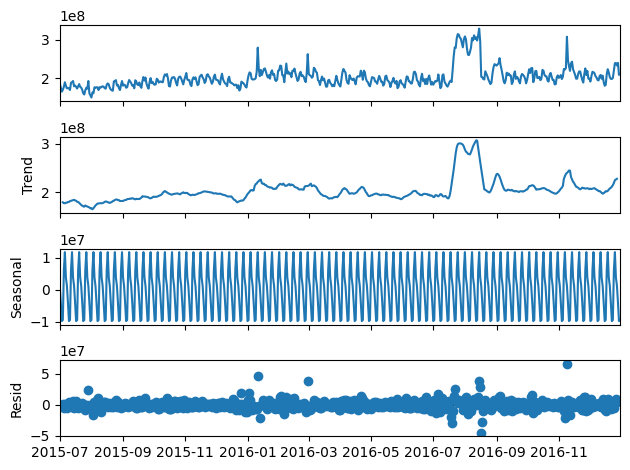

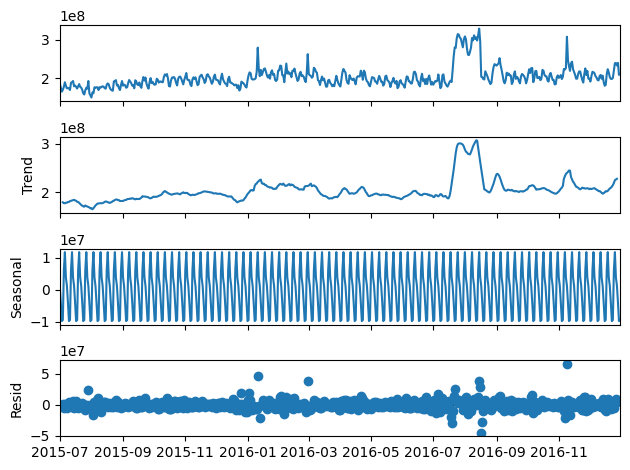

In [64]:
result = seasonal_decompose(df2, model='add')
result.plot()

### Run <tt>pmdarima.auto_arima</tt> to obtain recommended orders
This may take awhile as there are a lot more combinations to evaluate.

In [65]:
!pip install pmdarima

In [66]:
from pmdarima import auto_arima

In [ ]:
auto_arima(df2, seasonal=True, m=12).summary()


### Split the data into train/test sets

In [ ]:
len(df2)

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 550 entries, 2015-07-01 to 2016-12-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Views   550 non-null    float64
dtypes: float64(1)
memory usage: 8.6 KB


In [45]:
df2.Views.value_counts()

,count
Views,
187742741.5,1
192307441.0,1
195120583.5,1
184089920.5,1
190628957.5,1
...,...
173541602.5,1
168820333.5,1
182497836.0,1


In [54]:
# Set one year for testing
train = df.iloc[:365]
test = df.iloc[365:]

In [56]:
print(train.dtypes)

Page           object
2015-07-01    float64
2015-07-02    float64
2015-07-03    float64
2015-07-04    float64
               ...   
2016-12-27    float64
2016-12-28    float64
2016-12-29    float64
2016-12-30    float64
2016-12-31    float64
Length: 551, dtype: object


In [57]:
train = pd.to_numeric(train, errors='coerce')


TypeError: arg must be a list, tuple, 1-d array, or Series

### Fit a SARIMA(2, 1, 2)(2,0,0,12) Model

In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [52]:
# Convert relevant columns in 'train' to numeric type
df2['Views']= pd.to_numeric(df2['Views'], errors='coerce')


In [58]:
model = SARIMAX(train, order=(2, 1, 2), seasonal_order = (2, 0, 0, 12))
results = model.fit()
results.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).